In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
import Plot as ptk
import Imperfection as imp
from scipy.interpolate import UnivariateSpline
from plotly.graph_objs import Layout, Data, Figure, Marker
from plotly.graph_objs import Scatter3d, Scatter, Histogram
from plotly import tools
from plotly.offline import iplot as iplt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from scipy import optimize
import pickle
import pandas as pd
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

## Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of grid shells

grid shells with various span (L), spen-to-height ratio (L/H), grid density (gN) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analyses

In [8]:
runNb=42
GeomType = 3 # Kiewitt
LperHA = np.zeros(runNb, dtype=np.int16)
gNA    = np.zeros(runNb, dtype=np.int16)
gRA    = np.zeros(runNb, dtype=np.int16)
SpanA  = np.zeros(runNb, dtype=np.int16)
DStart = np.zeros(runNb)
DStep  = np.zeros(runNb)
tStart = np.zeros(runNb, dtype=np.int16)
tStep  = np.zeros(runNb, dtype=np.int16)
FA     = np.zeros(runNb)
GData   = np.zeros((runNb,9), dtype=np.int16)

GData[0]  = 10, 6,  8, 40, 150, 50,  5,   5, -500
GData[1]  = 8,  5,  5, 20, 50,  50,  5,   5, -500
GData[2]  = 6,  8,  5, 40, 150, 50,  5,  10, -900
GData[3]  = 5,  6,  6, 40, 100, 50,  5,  10, -500 #improved convergence criteria, more load steps
GData[4]  = 4,  6,  4, 20, 60,  25,  3,  10, -180
GData[5]  = 3,  6,  9, 60, 50,  50,  5, 10, -1000 #improved convergence criteria, more load steps

GData[6]  = 10, 8,  6, 30, 100, 50,  5,  10, -500 
GData[7]  = 8,  6,  5, 40, 120, 60,  10, 10, -500 #improved convergence criteria, more load steps
GData[8]  = 6,  6,  7, 50, 180, 60,  10, 10, -600
GData[9]  = 5,  7,  6, 50, 120, 60,  10, 10, -700
GData[10] = 4,  9,  6, 40, 100, 50,  5,  10, -500 
GData[11] = 3,  5,  5, 30, 60,  50,  3,  10, -500

GData[12] = 10, 6,  8, 30, 80,  50,  5,  10, -500 #improved convergence criteria, more load steps
GData[13] = 8,  5,  5, 60, 150, 100, 15, 10, -1200
GData[14] = 6,  6,  7, 60, 150, 75,  10, 10, -600
GData[15] = 5,  6,  6, 20, 50,  25,  5,  10, -500
GData[16] = 4,  9,  6, 50, 120, 60,  10, 10, -600
GData[17] = 3,  6,  9, 40, 50,  25,  5,  10,  -500 #improved convergence criteria, more load steps

GData[18] = 10, 6,  7, 40, 100, 50, 10,  10, -1100 
GData[19] = 8,  5,  4, 20, 50,  25,  5,  10, -500
GData[20] = 6,  8,  6, 40, 100, 50,  5,  10, -500
GData[21] = 5,  6,  7, 40, 150, 50,  5,  10, -500
GData[22] = 4,  6,  3, 20, 70,  25,  3,  10, -400
GData[23] = 3,  6,  8, 60, 100, 50,  5,  10, -500 #improved convergence criteria, more load steps

GData[24] = 10, 6, 8, 60, 150, 100, 10, 10, -500
GData[25] = 8,  6, 8, 60, 150, 100, 10, 10, -700
GData[26] = 6,  6, 8, 30, 50,  30,  5,  10, -500
GData[27] = 5,  6, 8, 40, 50,  50,  5,  10, -500 #improved convergence criteria, more load steps
GData[28] = 4,  6, 8, 20, 40,  10,  3,  10, -100 #improved convergence criteria, more load steps
GData[29] = 3,  6, 8, 20, 40,  10,  3,  10, -50 #improved convergence criteria, more load steps

GData[30] = 10, 8, 6, 60, 150, 100, 10, 10, -500
GData[31] = 8,  8, 6, 20, 50,  20,  5, 10, -700
GData[32] = 6,  8, 6, 60, 150, 100, 10,  10, -600
GData[33] = 5,  8, 6, 40, 50,  50,  5,  10, -500
GData[34] = 4,  8, 6, 20, 40,  10,  3,  10, -150
GData[35] = 3,  8, 6, 50, 100, 50,  10,  10, -1000

GData[36] = 10, 5, 6, 50, 100, 100, 10, 10, -500
GData[37] = 8,  7, 6, 30, 50,  30,  5,  10, -700
GData[38] = 6,  7, 6, 40, 50,  50,  5,  10, -600
GData[39] = 5,  5, 5, 20, 40,  50,  3,  10, -500
GData[40] = 4,  7, 6, 60, 150, 50,  10, 10, -1000
GData[41] = 3,  7, 6, 40, 50,  50,  5,  10, -350 #improved convergence criteria, more load steps

for i in range(runNb):
    LperHA[i], gNA[i], gRA[i], SpanA[i], DStart[i] = GData[i,0], GData[i,1], GData[i,2], GData[i,3], GData[i,4]
    DStep[i], tStart[i], tStep[i], FA[i]           = GData[i,5], GData[i,6], GData[i,7], GData[i,8]

In [9]:
MatNL = True
n=4 # mm CHS cross-section diameter
m=1 # mm CHS cross-section thickness
nb = 4   # number of finite elements along one beam

In [10]:
size = 50
GRSA       = np.zeros(size, dtype=tp.GridShell)
CapacityFA = np.zeros((size, n*m))
CapacityA  = np.zeros((size, n*m))
rhoAA      = np.zeros((size, n*m))
IDA        = np.zeros(size, dtype=np.int16)
etaA       = np.zeros((size, n*m)) 
loadAA     = np.zeros((size, n*m, 51))
dispA      = np.zeros((size, n*m, 51))

In [ ]:
print('     L   n x r LpH   Lav  L/Lav')
print('-------------------------------')
for i in range(40,42):
    lavtemp, ndnb = tk.calclav2(SpanA[i],LperHA[i],gNA[i],GeomType,gRA[i])
    print('{:2d}: {:2.0f}  {:2.0f} x{:2.0f}  {:2.0f}  {:4.1f}  {:4.1f}     {:d}'.format(i,SpanA[i],gNA[i],gRA[i],LperHA[i],lavtemp,SpanA[i]/lavtemp,ndnb))

In [7]:
LmerA=np.zeros(runNb)
LmerA=[2.6,2.1,4.3,4.4,2.9,4.2,
       2.6,4.2,3.8,4.6,3.8,3.8,
       1.9,6.2,4.6,1.9,4.8,2.8,
       2.9,2.6,3.6,3.1,3.8,4.7,
       3.9,3.9,2.0,2.7,1.4,1.6, 
       5.1,1.7,5.3,3.7,1.9,5.2,
       5.1,2.6,3.6,4.4,5.7,4.2]

     L    n x r  LpH  Lmer Lav  L/Lav    nb of Nodes
-----------------------------------------------------
 0:  40   6 x 8  10   2.6  2.8  14.1     2017        eq
 1:  20   5 x 5   8   2.1  2.5   8.0     676
 2:  40   8 x 5   6   4.3  4.1   9.7     1081        eq
 3:  40   6 x 6   5   4.4  4.0  10.1     1153
 4:  20   6 x 4   4   2.9  3.0   6.6     529         eq
 5:  60   6 x 9   3   4.2  4.4  13.7     2539        eq
 
 6:  30   8 x 6  10   2.6  2.5  12.0     1537        eq
 7:  40   6 x 5   8   4.2  4.6   8.8     811
 8:  50   6 x 7   6   3.8  4.2  12.0     1555
 9:  50   7 x 6   5   4.6  4.6  10.8     1345        eq
 10: 40   9 x 6   4   3.8  3.5  11.5     1729        
 11: 30   5 x 5   3   3.8  4.3   7.1     676
 
 12: 30   6 x 8  10   1.9  2.1  14.1     2017        eq
 13: 60   5 x 5   8   6.2  7.5   8.0     676
 14: 60   6 x 7   6   4.6  5.0  11.9     1555
 15: 20   6 x 6   5   1.9  2.0  10.1     1153        eq
 16: 50   9 x 6   4   4.8  4.4  11.5     1729
 17: 40   6 x 9   3   2.8  2.9  13.7     2539        eq
 
 18: 40   6 x 7  10   2.9  3.2  12.3     1555        eq 
 19: 20   5 x 4   8   2.6  3.1   6.4     441
 20: 40   8 x 6   6   3.6  3.4  11.6     1537        eq
 21: 40   6 x 7   5   3.1  3.4  11.7     1555        
 22: 20   6 x 3   4   3.8  4.0   5.0     307         eq
 23: 60   6 x 8   3   4.7  4.9  12.2     2017        eq
 
 24: 60   6 x 8  10   3.8  4.3  14.1     2017
 25: 60   6 x 8   8   3.9  4.3  13.9     2017
 26: 30   6 x 8   6   2.0  2.2  13.6     2017        eq
 27: 40   6 x 8   5   2.7  3.0  13.4     2017
 28: 20   6 x 8   4   1.4  1.5  12.9     2017        eq
 29: 20   6 x 8   3   1.6  1.6  12.2     2017        eq
 
 30: 60   8 x 6  10   5.1  5.0  12.0     1537        eq
 31: 20   8 x 6   8   1.7  1.7  11.9     1537        eq
 32: 60   8 x 6   6   5.3  5.2  11.6     1537        eq 
 33: 40   8 x 6   5   3.7  3.5  11.4     1537        eq
 34: 20   8 x 6   4   1.9  1.8  11.0     1537        eq
 35: 50   8 x 6   3   5.2  4.8  10.3     1537
 
 36: 60   5 x 6  10   5.1  6.2   9.6     961
 37: 30   7 x 6   8   2.6  2.7  11.3     1345
 38: 40   7 x 6   6   3.6  3.6  11.0     1345
 39: 40   5 x 5   5   4.4  5.2   7.7     676
 40: 60   7 x 6   4   5.7  5.7  10.5     1345
 41: 40   7 x 6   3   4.2  4.1   9.8     1345

## Load results

In [12]:
ga = pickle.load( open(mainpath+"/Saved results/GRSA_OldalnyomasosALL_Geom3_i.p", "rb" ) )
with pd.HDFStore(mainpath+'/Saved results/OldalnyomasosALL_Geom3_i.h5') as store:
    ca = store['CapacityA']
    cf = store['CapacityFA']
    rh = store['rhoAA']
    et = store['etaA']
    l1 = store['loadA1']
    l2 = store['loadA2']
    l3 = store['loadA3']
    l4 = store['loadA4']
    d1 = store['dispA1']
    d2 = store['dispA2']
    d3 = store['dispA3']
    d4 = store['dispA4']

In [13]:
size = 50
GRSA = ga
CapacityA  = ca.values
CapacityFA = cf.values
rhoAA      = rh.values
etaA       = et.values
loadAA     = np.zeros((size, n*m, 51))
loadAA[:,0,:]  = l1.values
loadAA[:,1,:]  = l2.values
loadAA[:,2,:]  = l3.values
loadAA[:,3,:]  = l4.values
dispA      = np.zeros((size, n*m, 51))
dispA[:,0,:]   = d1.values
dispA[:,1,:]   = d2.values
dispA[:,2,:]   = d3.values
dispA[:,3,:]   = d4.values

## Analysis

In [ ]:
for i in {0}:
    amp=SpanA[i]/1000
    GRSA[i], CapacityFA[i], CapacityA[i], rhoAA[i], etaA[i], loadAAlarge, dispAlarge= tk.loop_analyse_imp(n, m, LperHA[i], gNA[i], SpanA[i], nb, FA[i], DStart[i], DStep[i], tStart[i], tStep[i], amp, suptype=0, geomtype=3,gR=gRA[i],steps=200,msz=0.001)
    
    for j in range(51):
        loadAA[i,:,j]=loadAAlarge[:,j*4]
        dispA[i,:,j]=dispAlarge[:,j*4]  

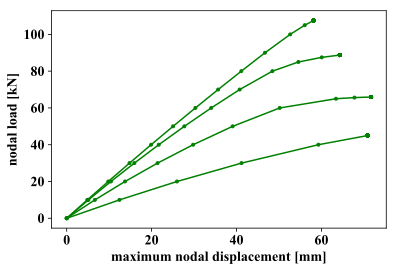

In [15]:
j=0
for i in range(n*m):
    plot = plt.plot(dispA[j,i],loadAA[j,i],'go-',ms=3) # dot plot
plot = plt.xlabel('maximum nodal displacement [mm]')
plot = plt.ylabel('nodal load [kN]')

## Reference

In [16]:
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [0, 158, 115]] # bluish green
c3=[c/255. for c in [240, 228, 66]]  # yellow
c4=[c/255. for c in [0, 114, 178]]   # blue
c5=[c/255. for c in [204, 121, 167]] # reddish purple
c6=[c/255. for c in [86, 180, 233]] # sky blue
#c1=[c/255. for c in [230, 159, 0]]   # orange
col=[c1,c2,c3,c4,c5,c6]
mar = ['o', '<', 'D', 'v', 'X', '>', 's']
LperHAord=np.array([LperHA[0],LperHA[1], LperHA[2], LperHA[3], LperHA[4], LperHA[5]])
Cmax=20
Cmin=3
c=np.zeros(6)
for i in range(6):
    c[i]=(LperHAord[i]-10.3)**2/26+1

[0.895, 0.11]


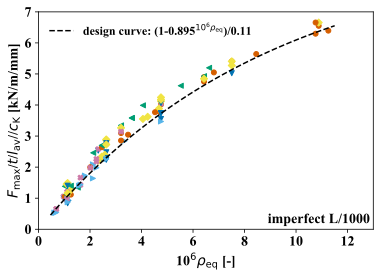

In [17]:
plt.figure(figsize=(6,4))

#load perfect results
CapacityAp  = np.zeros((size, n*m))
rhoAAp      = np.zeros((size, n*m))
ga = pickle.load( open( mainpath+"/Saved results/GRSA_OldalnyomasosALL_Geom3.p", "rb" ) )
with pd.HDFStore(mainpath+'/Saved results/OldalnyomasosALL_Geom3.h5') as store:
    ca = store['CapacityA']
    rh = store['rhoAA']
CapacityAp  = ca.values[42:84]
rhoAAp      = rh.values[42:84]

refx=np.zeros(runNb*4+1)
refy=np.zeros(runNb*4+1)
k=0
for i in range(runNb):
        if GRSA[i].gN==9: div=0.95
        elif GRSA[i].gN==8: div=1 
        elif GRSA[i].gN==7: div=1.08    
        elif GRSA[i].gN==6: div=1.15
        perf = np.interp(rhoAA[i], rhoAAp[i], CapacityAp[i])
        decrese = (perf - CapacityA[i]) / perf    
        for j in range(n*m):
            if CapacityA[i,j]>=Cmin and CapacityA[i,j]<=Cmax and GRSA[i].gN in {6,7,8,9} and GRSA[i].span / GRSA[i].Lav>8:
                if decrese[j] > 0 and GRSA[i].span / GRSA[i].height not in {8,6}:
                    k+=1
                    refx[k]=rhoAA[i,j]
                    refy[k]=CapacityFA[i,j] /GRSA[i].secT/1000 /c[(i)%6] / GRSA[i].Lav/div
                plt.plot(rhoAA[i,j] *1e6, CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav/c[(i)%6]/div, color=col[i%6], marker=mar[i%6], ms=5)
                #else:
                #    plt.plot(rhoAA[i,j] *1e6, CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav/c[(i)%6]/div, cm[i], ms=5,fillStyle='none')
                                          

keys=np.argsort(refx)
refx=refx[keys]
refy=refy[keys]

def ef(x, a1, a2):
    return (1-a1**x)/a2
params, _ = optimize.curve_fit(ef, refx* 1e6, refy)
refxlin=np.linspace(0,11.5,100)
params=[0.895,0.11] # so that less predictions are below the numerical result
plt.plot(refxlin[4:],ef(refxlin[4:],params[0],params[1]),'k--')
print(params)

ref_ln = mlines.Line2D([], [], color='k', label='design curve: (1-0.895$^{10^6\\rho_{\\rm eq}}$)/0.11',linestyle='--')
plt.legend(handles=[ref_ln],frameon=False,loc=2,fontsize=12)

plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$//$c_{\\rm K}$ [kN/m/mm]')
plt.xlim(0,13)
plt.ylim(0,7)
plt.xticks(np.arange(0,13.1,2))
plt.text(8.9, 0.2, 'imperfect L/1000')

plt.savefig('G3_1000.pdf', bbox_inches='tight')

plt.show()

# Hiba

In [18]:
iplt(tk.calc_error_Kiewitt(GRSA,rhoAA,CapacityA,refxlin*1e-6,ef(refxlin,params[0],params[1]),runNb=42,detailOn=False))

Max error:        29.3%
Min error:        -27.8%
Average error:     5.2%
104


# Save results

In [58]:
pickle.dump(GRSA, open( mainpath+"/Saved results/GRSA_OldalnyomasosALL_Geom3_i.p", "wb" ) )

In [59]:
A_df  = pd.DataFrame(CapacityA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
B_df  = pd.DataFrame(CapacityFA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
C_df  = pd.DataFrame(rhoAA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
D_df  = pd.DataFrame(etaA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
E_df1 = pd.DataFrame(loadAA[:,0,:]) #sec1
E_df2 = pd.DataFrame(loadAA[:,1,:]) #sec2
E_df3 = pd.DataFrame(loadAA[:,2,:]) #sec3
E_df4 = pd.DataFrame(loadAA[:,3,:]) #sec4
F_df1 = pd.DataFrame(dispA[:,0,:])  #sec1
F_df2 = pd.DataFrame(dispA[:,1,:])  #sec2
F_df3 = pd.DataFrame(dispA[:,2,:])  #sec3
F_df4 = pd.DataFrame(dispA[:,3,:])  #sec4
G_df  = pd.DataFrame(refxlin)
H_df  = pd.DataFrame(ef(refxlin,params[0],params[1]))

with pd.HDFStore(mainpath+'/Saved results/OldalnyomasosALL_Geom3_i.h5') as store:
    store['CapacityA'] = A_df
    store['CapacityFA']= B_df
    store['rhoAA']     = C_df
    store['etaA']      = D_df
    store['loadA1']    = E_df1
    store['loadA2']    = E_df2
    store['loadA3']    = E_df3
    store['loadA4']    = E_df4
    store['dispA1']    = F_df1
    store['dispA2']    = F_df2
    store['dispA3']    = F_df3
    store['dispA4']    = F_df4
    store['refx']      = G_df
    store['refy']      = H_df